In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###  Example 7.1. 산점도 작성 - plot 함수

In [16]:
Student = pd.read_csv("./data/Student.csv")
Student

,ID,Age,Income,Expense
0,1,25,170,67
1,2,28,177,62
2,3,20,165,53
3,4,16,150,48
4,5,19,160,58
5,6,21,160,59
6,7,22,173,60
7,8,16,169,57
8,9,20,169,70
9,10,19,170,71


In [17]:
Student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ID       17 non-null     int64
 1   Age      17 non-null     int64
 2   Income   17 non-null     int64
 3   Expense  17 non-null     int64
dtypes: int64(4)
memory usage: 672.0 bytes


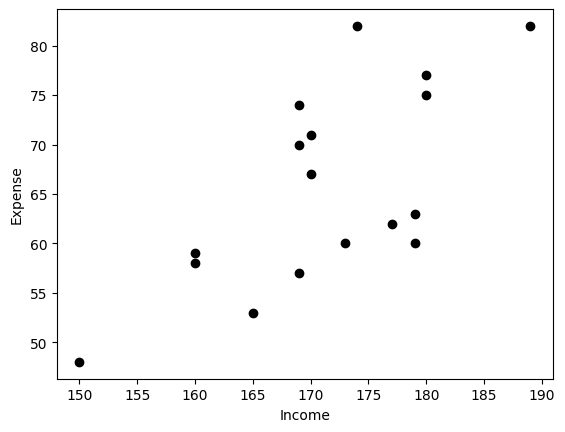

In [20]:
# plt.plot(np.array(Studnet.Income), np.array(student.Expense), marker='o', linestyle='None')
plt.plot("Income", "Expense", 'o', color="black", data=Student)
plt.xlabel("Income")
plt.ylabel("Expense")
plt.show()

###  Example 7.2. 산점도 작성 - scatter 함수

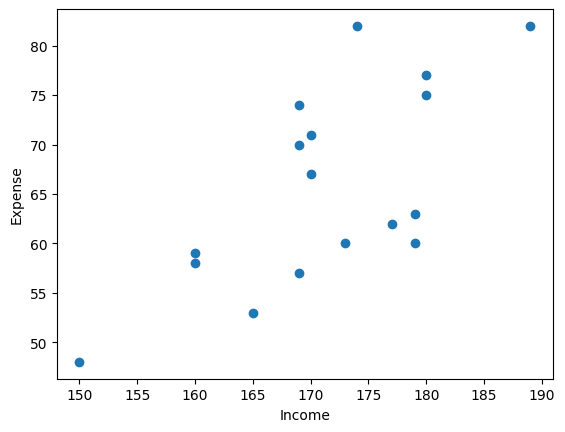

In [21]:
plt.scatter("Income", "Expense", data=Student)
plt.xlabel("Income")
plt.ylabel("Expense")
plt.show()

###  Example 7.3. 산점도 작성 - jointplot 함수

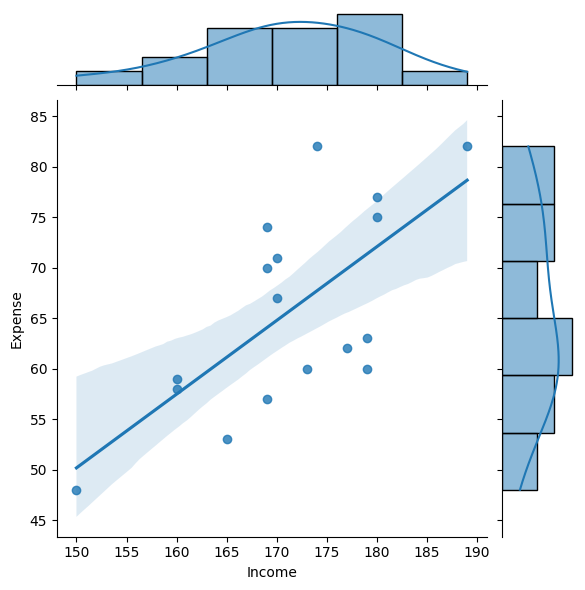

In [22]:
import seaborn as sns
# pd.set_option('compute.use_numexpr', True)

sns.jointplot(x="Income", y="Expense", data=Student, kind="reg")

###  Example 7.3. 산점도 작성 - jointplot 함수

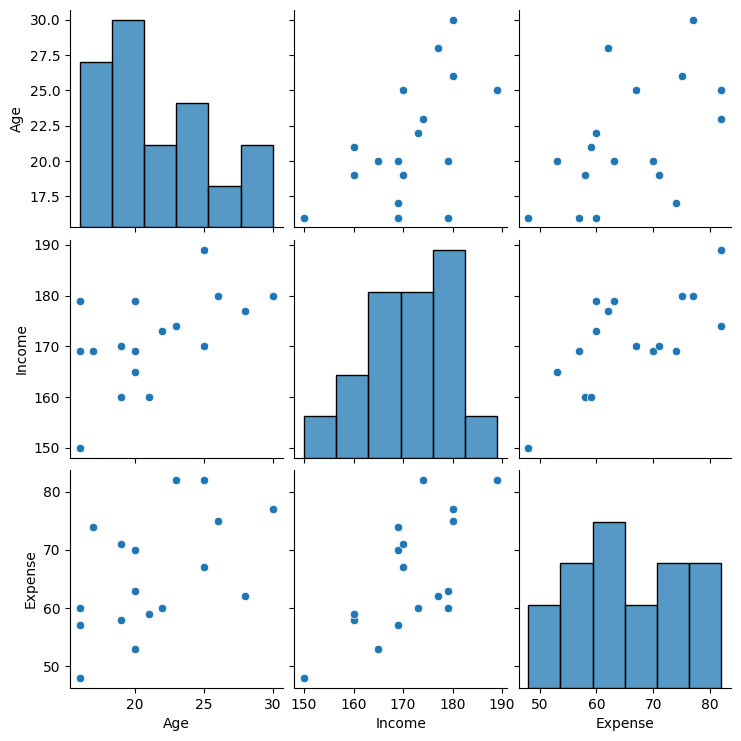

In [26]:
sns.pairplot(Student.iloc[:, 1:4])

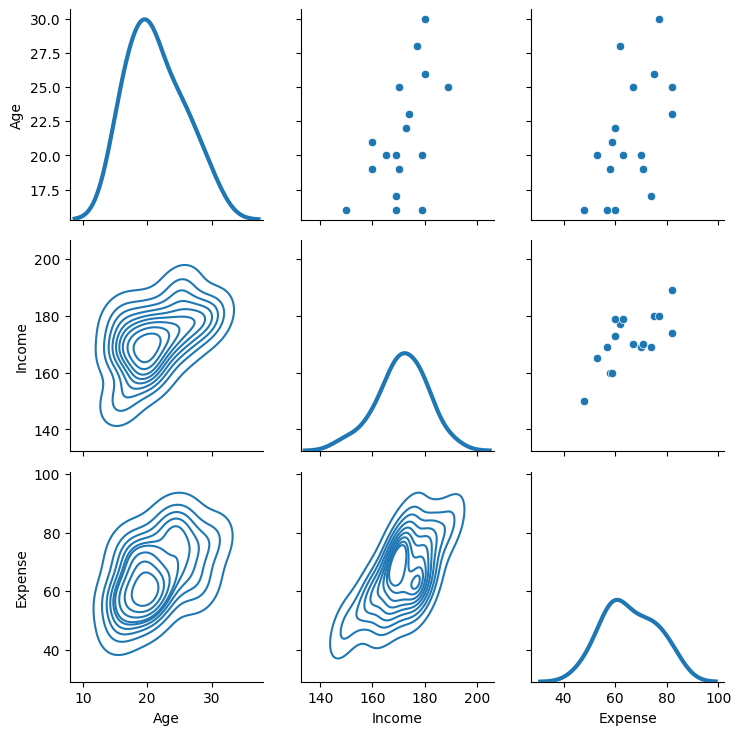

In [27]:
g = sns.PairGrid(Student.iloc[:, 1:4])
g.map_upper(sns.scatterplot)    # 대각선 위: 산점도
g.map_lower(sns.kdeplot)    # 대각선 아래: Kernal Destiny
g.map_diag(sns.kdeplot, lw=3)   # 대각선: Kernel Destiny, 선 너비=3

### Example 7.5. 상관계수의 계산

In [28]:
Student.iloc[:, 1:4].corr(method="pearson")

,Age,Income,Expense
Age,1.000000,0.546968,0.529814
Income,0.546968,1.000000,0.681296
Expense,0.529814,0.681296,1.000000


### Example 7.6. 상관계수에 대한 검정

In [32]:
from scipy.stats import pearsonr

pearsonr(Student.Income, Student.Expense)

PearsonRResult(statistic=0.6812956535794542, pvalue=0.0026006496946941993)

### Example 7.7 상관계수와 p-value를 함께 출력하기

In [34]:
# !pip install pingouin
import pingouin as pg

Student.iloc[:, 1:4].pairwise_corr(method="pearson").round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Age,Income,pearson,two-sided,17,0.547,"[0.09, 0.81]",0.023,3.255,0.653
1,Age,Expense,pearson,two-sided,17,0.530,"[0.07, 0.81]",0.029,2.735,0.619
2,Income,Expense,pearson,two-sided,17,0.681,"[0.3, 0.88]",0.003,19.505,0.889


### Example 7.8 상관계수와 그래프적 표현

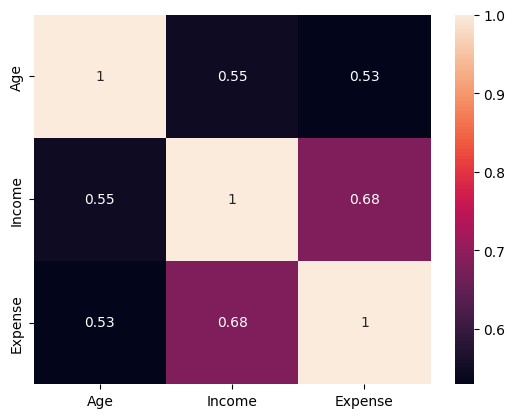

In [37]:
corrMatrix = Student.iloc[:, 1:4].corr(method="pearson")
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Example 7.9 단순 상관계수의 계산

In [38]:
Satis = pd.read_csv("./data/Satis.csv")
Satis

,ID,Age,Satis1,Satis2
0,1,28,0,70
1,2,23,0,55
2,3,26,5,65
3,4,27,5,65
4,5,25,10,60
5,6,26,20,65
6,7,29,25,70
7,8,31,25,75
8,9,32,25,80
9,10,34,40,85


In [39]:
Satis.iloc[:, 1:4].corr().round(3)

,Age,Satis1,Satis2
Age,1.000,0.698,0.993
Satis1,0.698,1.000,0.703
Satis2,0.993,0.703,1.000


### Example 7.10 편상관계수와 계산

In [40]:
Satis.iloc[:, 1:4].pcorr().round(3)

,Age,Satis1,Satis2
Age,1.000,-0.003,0.987
Satis1,-0.003,1.000,0.115
Satis2,0.987,0.115,1.000


### Example 7.11 연령대별로 구분된 산점도 작성

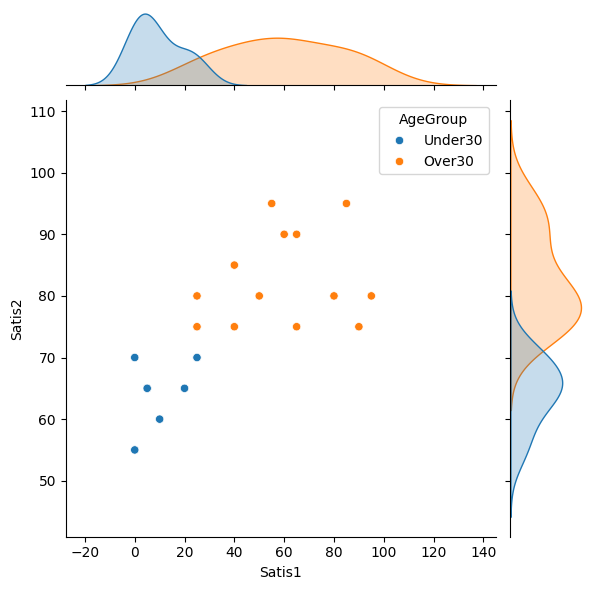

In [42]:
Satis.loc[Satis.Age<30, "AgeGroup"] = "Under30"
Satis.loc[Satis.Age>=30, "AgeGroup"] = "Over30"

sns.jointplot(
    x="Satis1",
    y="Satis2",
    data=Satis,
    hue="AgeGroup"  # hue: 집단 변수(색을 구분하는 변수)
)

### Example 7.12 연령대별 상관계수의 출력

In [44]:
SatisUnder30 = Satis.loc[Satis.AgeGroup == "Under30"]
SatisOver30 = Satis.loc[Satis.AgeGroup == "Over30"]

print(pearsonr(SatisUnder30.Satis1, SatisUnder30.Satis2))
print(pearsonr(SatisOver30.Satis1, SatisOver30.Satis2))

PearsonRResult(statistic=0.38797014489949266, pvalue=0.38979066100658993)
PearsonRResult(statistic=0.17182016983164788, pvalue=0.5746020827503784)


### Example 7.13 '상사의 업무수행능력'에 대한 신뢰도 분석

In [45]:
Ability = pd.read_csv("./data/Ability.csv")
Ability[["Q01", "Q02", "Q03"]].corr()

,Q01,Q02,Q03
Q01,1.000000,0.596712,0.407001
Q02,0.596712,1.000000,0.433838
Q03,0.407001,0.433838,1.000000


In [49]:
import pingouin as pg

pg.cronbach_alpha(data=Ability[["Q01", "Q02", "Q03"]])  # 크론바흐 알파, 신뢰구간

(0.7351921832148215, array([0.697, 0.769]))

### Example 7.14 '상사와의 공적/개인적 긴밀함'에 대한 신뢰도 분석 - 1

In [50]:
Ability[["Q04", "Q05", "Q06", "Q07"]].corr()

,Q04,Q05,Q06,Q07
Q04,1.000000,0.100787,0.307348,-0.351547
Q05,0.100787,1.000000,0.241432,-0.273088
Q06,0.307348,0.241432,1.000000,-0.350307
Q07,-0.351547,-0.273088,-0.350307,1.000000


In [51]:
pg.cronbach_alpha(
    data=Ability[["Q04", "Q05", "Q06", "Q07"]]
)

(-0.2224494957901865, array([-0.386, -0.073]))

### Example 7.15 '상사와의 공적/개인적 긴밀함'에 대한 신뢰도 분석 - 2

In [52]:
Ability["Q07_R"] = 6 - Ability.Q07
Ability[["Q04", "Q05", "Q06", "Q07_R"]].corr()

,Q04,Q05,Q06,Q07_R
Q04,1.000000,0.100787,0.307348,0.351547
Q05,0.100787,1.000000,0.241432,0.273088
Q06,0.307348,0.241432,1.000000,0.350307
Q07_R,0.351547,0.273088,0.350307,1.000000


In [53]:
pg.cronbach_alpha(
    data=Ability[["Q04", "Q05", "Q06", "Q07_R"]]
)

(0.5876937990663734, array([0.532, 0.638]))

### Example 7.16 '업무추진 독자성'에 대한 신뢰도 분석

In [55]:
Ability[["Q08", "Q09", "Q10"]].corr()

,Q08,Q09,Q10
Q08,1.000000,0.22047,0.067734
Q09,0.220470,1.00000,-0.001290
Q10,0.067734,-0.00129,1.000000


In [56]:
pg.cronbach_alpha(
    data=Ability[["Q08", "Q09", "Q10"]]
)

(0.25112573908813685, array([0.144, 0.347]))

### Example 7.17 참조: 표준화 그로바흐 알파 계수

In [57]:
def  CronbachAlpha(df):
    df_corr = df.corr() # 상관계수
    N = df.shape[1] # N: 변수(문항)의 수
    rs = np.array([])

    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)

    mean_r = np.mean(rs)    # 상관계수들의 평균

    # 표준화 Cronbach's Alpha 공식
    cronbach_alpha = (N*mean_r) / (1+(N-1) * mean_r)
    
    return cronbach_alpha

In [58]:
CronbachAlpha(Ability[["Q01", "Q02", "Q03"]])

0.7340559223240841

In [59]:
CronbachAlpha(Ability[["Q04", "Q05", "Q06", "Q07_R"]])

0.5976014343918359

In [60]:
CronbachAlpha(Ability[["Q08", "Q09", "Q10"]])

0.24084556669287197